# DataFrame Exploratory Data Analysis
-Bhushan Dhamankar

In [67]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time

In [68]:
# Reading Dataset
data=pd.read_csv("DataFrame.csv")
# Renaming Columns
data.columns=[ 'Type','Date','Minute_Mark','Opening_Price','High','Low','Closing_Price','Target']
data.head()

,Type,Date,Minute_Mark,Opening_Price,High,Low,Closing_Price,Target
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [69]:
# creating Target Column
data['Target']=np.where(data['Opening_Price']-data['Closing_Price']<0,'up','down')

In [70]:
data.head()

,Type,Date,Minute_Mark,Opening_Price,High,Low,Closing_Price,Target
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,up
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,down
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,up
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,up
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,down


### Features:-
    1) Type
    2) Date
    3) Minute_Mark
    4) Opening_Price
    5) High
    6) Low
    7) Closing Price
    8) Target

In [71]:
data.shape

(22805, 8)

In [72]:
# checking Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           22805 non-null  object 
 1   Date           22805 non-null  int64  
 2   Minute_Mark    22805 non-null  object 
 3   Opening_Price  22805 non-null  float64
 4   High           22805 non-null  float64
 5   Low            22805 non-null  float64
 6   Closing_Price  22805 non-null  float64
 7   Target         22805 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.4+ MB


OBSERVATION 1: No Null Values

In [73]:
# Continuous Numerical Features
num_features=[feature for feature in data.columns if data[feature].dtypes!='O']
num_features.remove('Date')
num_features

['Opening_Price', 'High', 'Low', 'Closing_Price']

### 1) Type Feature

In [74]:
# Checking Unique Values
data['Type'].unique()
data.drop(['Type'],axis=1,inplace=True)

OBSERVATION 2: as Type has only one unique value so, it is not relevant to analysis.

### 2) Date Feature

In [65]:
# Checking Data Type
data['Date'].dtype

dtype('int64')

In [75]:
data['Date']=pd.to_datetime(data['Date'],format='%Y%m%d')

In [76]:
# Deriving Month and Day Features
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day

In [78]:
data=data[['Date','Month', 'Day', 'Minute_Mark', 'Opening_Price', 'High', 'Low',
       'Closing_Price', 'Target']]

In [79]:
data.head()

,Date,Month,Day,Minute_Mark,Opening_Price,High,Low,Closing_Price,Target
0,2021-01-01,1,1,09:16,13997.90,14020.85,13991.35,14013.15,up
1,2021-01-01,1,1,09:17,14014.85,14018.55,14008.15,14009.05,down
2,2021-01-01,1,1,09:18,14008.05,14013.10,14005.05,14012.70,up
3,2021-01-01,1,1,09:19,14013.65,14019.10,14013.65,14016.20,up
4,2021-01-01,1,1,09:20,14015.45,14017.80,14011.95,14015.45,down


In [80]:
data['Month'].unique()

array([1, 2, 3], dtype=int64)

In [81]:
data['Day'].unique()

array([ 1,  4,  5,  6,  7,  8, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 25,
       27, 28, 29,  2,  3,  9, 10, 16, 17, 23, 24, 26, 30, 31],
      dtype=int64)

### 3) Minute Mark

In [82]:
# Checking Data Type
data['Minute_Mark'].dtype

dtype('O')

In [83]:
# Converting to DateTime Variable
data['Minute_Mark']=pd.to_datetime(data['Minute_Mark'])

In [85]:
# Deriving Hour Feature
data['Hr']=data['Minute_Mark'].dt.hour

In [86]:
# Deriving Min Feature
data['Min']=data['Minute_Mark'].dt.minute

In [87]:
data.head()

,Date,Month,Day,Minute_Mark,Opening_Price,High,Low,Closing_Price,Target,Hr,Min
0,2021-01-01,1,1,2021-05-16 09:16:00,13997.90,14020.85,13991.35,14013.15,up,9,16
1,2021-01-01,1,1,2021-05-16 09:17:00,14014.85,14018.55,14008.15,14009.05,down,9,17
2,2021-01-01,1,1,2021-05-16 09:18:00,14008.05,14013.10,14005.05,14012.70,up,9,18
3,2021-01-01,1,1,2021-05-16 09:19:00,14013.65,14019.10,14013.65,14016.20,up,9,19
4,2021-01-01,1,1,2021-05-16 09:20:00,14015.45,14017.80,14011.95,14015.45,down,9,20


In [88]:
data=data[['Date','Month', 'Day', 'Hr', 'Min', 'Minute_Mark', 'Opening_Price', 'High', 'Low', 'Closing_Price', 'Target']]

In [89]:
# Dropping Minute_Mark
data.drop('Minute_Mark',axis=1,inplace=True)

In [90]:
data.head()

,Date,Month,Day,Hr,Min,Opening_Price,High,Low,Closing_Price,Target
0,2021-01-01,1,1,9,16,13997.90,14020.85,13991.35,14013.15,up
1,2021-01-01,1,1,9,17,14014.85,14018.55,14008.15,14009.05,down
2,2021-01-01,1,1,9,18,14008.05,14013.10,14005.05,14012.70,up
3,2021-01-01,1,1,9,19,14013.65,14019.10,14013.65,14016.20,up
4,2021-01-01,1,1,9,20,14015.45,14017.80,14011.95,14015.45,down


### 4) Continuous  Numerical Feature

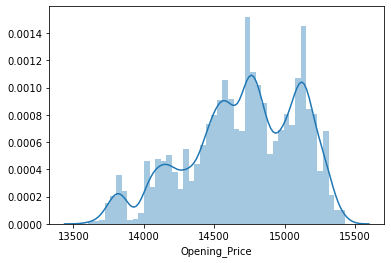

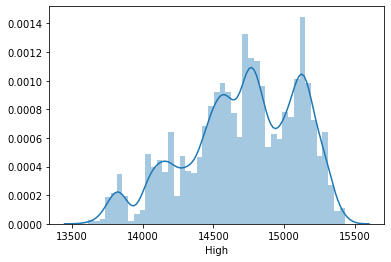

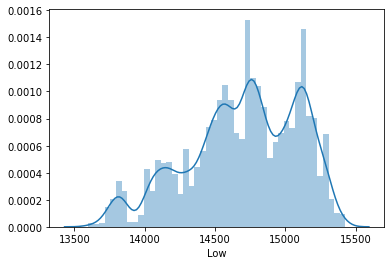

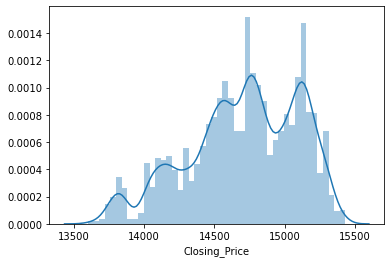

In [91]:
# Distribution
for feature in num_features:
    df=data.copy()
    sns.distplot(df[feature])
    plt.show()

OBSERVATION 3: The Distribution of the Numerical Variables is not Normal and are almost same

### 5) Target 

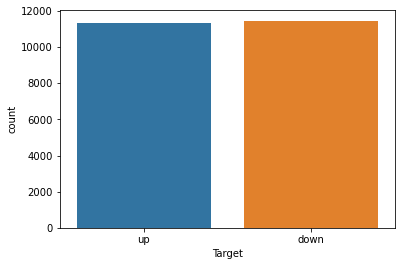

In [92]:
# Checking for Imbalanced Dataset
sns.countplot(data['Target'])

OBSERVATION 4: We have almost Balanced Dataset

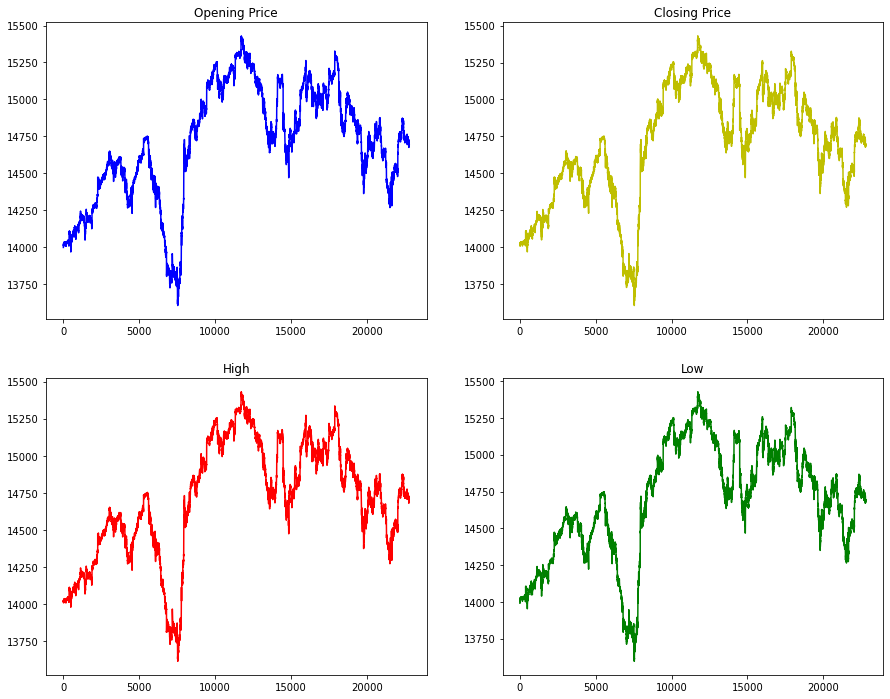

In [94]:
figure, axis = plt.subplots(2, 2,figsize=(15,12))
    
# For Opening Price
axis[0, 0].plot(data['Opening_Price'],color='b')
axis[0, 0].set_title("Opening Price")
  
# For Closing Price
axis[0, 1].plot(data['Closing_Price'],color='y')
axis[0, 1].set_title("Closing Price")
  
# For High
axis[1, 0].plot(data['High'],color='r')
axis[1, 0].set_title("High")
  
# For Low
axis[1, 1].plot(data['Low'],color='g')
axis[1, 1].set_title("Low")
  
# Combine all the operations and display
plt.show()

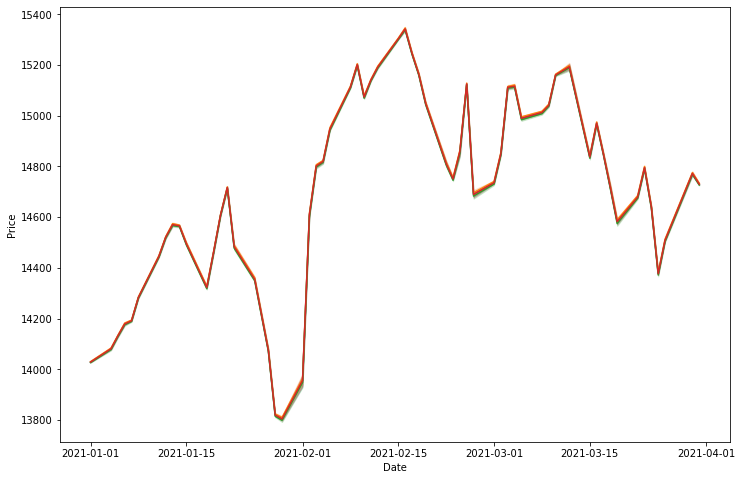

In [95]:
# Lineplot of Numerical Features(Opening Price, High, Low, Closing Price) for months
plt.figure(figsize =[12,8])
for i in num_features:
    sns.lineplot(y=df[i],x=df['Date'])
    plt.ylabel('Price')

OBSERVATION 5: There was a major Price drop in End of January

In [96]:
# Copy Dataset
df=data.copy()

In [97]:
# Deriving Difference in Opening and Closing Prices in percentage
df['Diff%']=((data['Closing_Price']-data['Opening_Price'])/data['Opening_Price'])*100

In [98]:
df.head()

,Date,Month,Day,Hr,Min,Opening_Price,High,Low,Closing_Price,Target,Diff%
0,2021-01-01,1,1,9,16,13997.90,14020.85,13991.35,14013.15,up,0.108945
1,2021-01-01,1,1,9,17,14014.85,14018.55,14008.15,14009.05,down,-0.041385
2,2021-01-01,1,1,9,18,14008.05,14013.10,14005.05,14012.70,up,0.033195
3,2021-01-01,1,1,9,19,14013.65,14019.10,14013.65,14016.20,up,0.018197
4,2021-01-01,1,1,9,20,14015.45,14017.80,14011.95,14015.45,down,0.000000


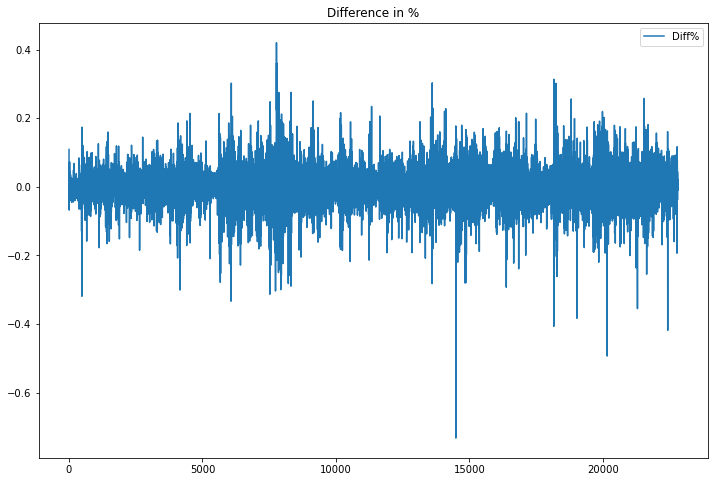

In [99]:
# Plotting Difference
df['Diff%'].plot(figsize = (12,8), title = 'Difference in %')
plt.legend(loc = 'best');

OBSERVATION 6: <br>
1) from above we can say that most of the time the percent of Increase and Decrease in Opening_Price is 0.2%<br>
2) Highest Increase in Opening_Price (UP) is 0.42%<br>
3) Highest Decrease is Opening_Price (DOWN) is 0.73%<br>


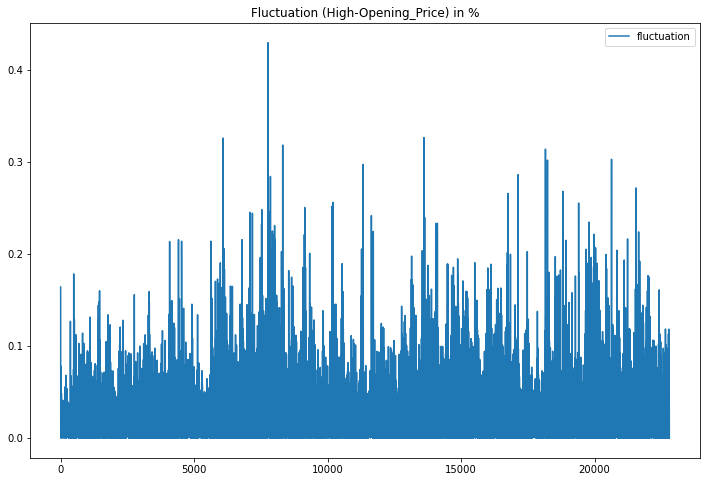

In [100]:
# Deriving Difference in High and Opening_Price in percentage
df['fluctuation']=((data['High']-data['Opening_Price'])/data['Opening_Price'])*100
df['fluctuation'].plot(figsize = (12,8), title = 'Fluctuation (High-Opening_Price) in %')
plt.legend(loc = 'best');

OBSERVATION 7: Highest Peak is 0.43%

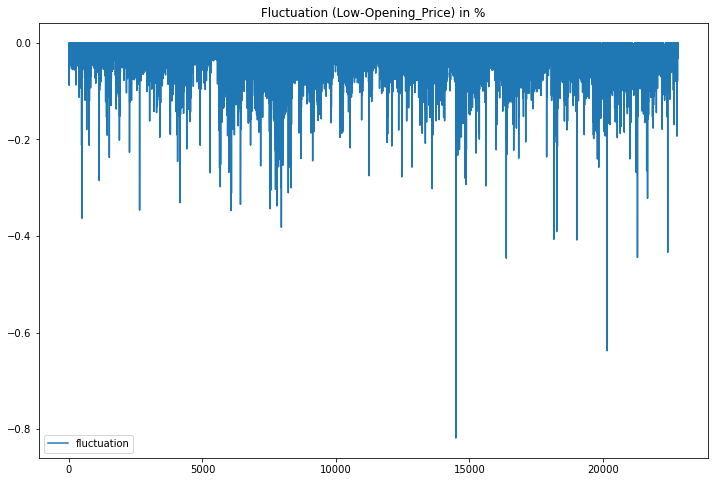

In [101]:
# Deriving Difference in High and Low in percentage
df['fluctuation']=((data['Low']-data['Opening_Price'])/data['Opening_Price'])*100
df['fluctuation'].plot(figsize = (12,8), title = 'Fluctuation (Low-Opening_Price) in %')
plt.legend(loc = 'best');

OBSERVATION 8: Lowest Drop is 0.82%

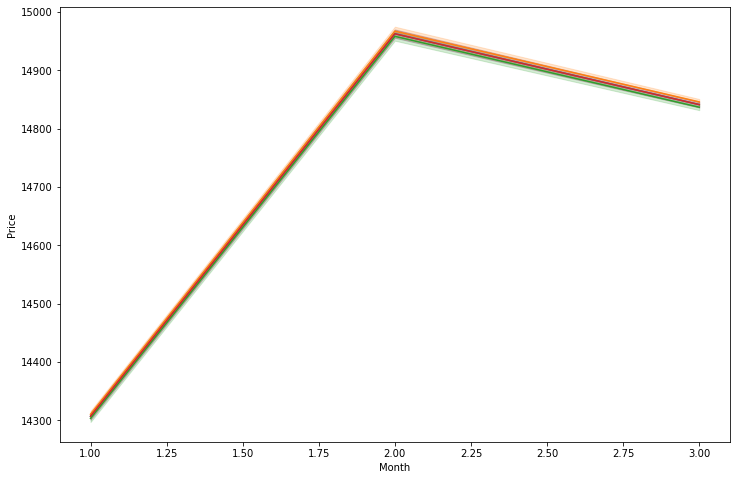

In [102]:
# Lineplot of Numerical Features(Opening Price, High, Low, Closing Price) for months
plt.figure(figsize =[12,8])
for i in num_features:
    sns.lineplot(y=df[i],x=df['Month'])
    plt.ylabel('Price')

OBSERVATION 9: Stock Prices Kept increasing till 2nd Month(February) and then started decreasing gradually

In [103]:
df.head()

,Date,Month,Day,Hr,Min,Opening_Price,High,Low,Closing_Price,Target,Diff%,fluctuation
0,2021-01-01,1,1,9,16,13997.90,14020.85,13991.35,14013.15,up,0.108945,-0.046793
1,2021-01-01,1,1,9,17,14014.85,14018.55,14008.15,14009.05,down,-0.041385,-0.047806
2,2021-01-01,1,1,9,18,14008.05,14013.10,14005.05,14012.70,up,0.033195,-0.021416
3,2021-01-01,1,1,9,19,14013.65,14019.10,14013.65,14016.20,up,0.018197,0.000000
4,2021-01-01,1,1,9,20,14015.45,14017.80,14011.95,14015.45,down,0.000000,-0.024972


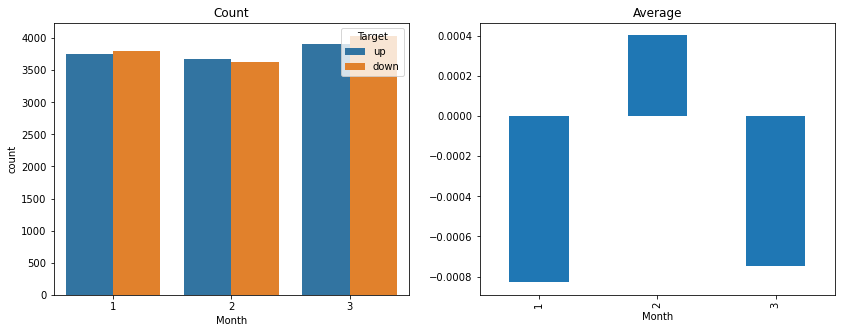

In [104]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data['Month'],hue=data['Target'])
plt.title("Count")
plt.subplot(1,2,2)
df.groupby('Month')['Diff%'].mean().plot.bar()
plt.title("Average")
plt.show()

OBSERVATION 10: above plot shows that the no. of Ups and Downs for each month are balanced

### Observations:
1) No Null Values<br>
2) Type has only one unique value so, it is not relevant to analysis.<br>
3) The Distribution of the Numerical Variables is not Normal and are almost same<br>
4) We have almost Balanced Dataset<br>
5) There was a major Price drop in End of January<br>
6) From above we can say that most of the time the percent of Increase and Decrease in Opening_Price is 0.2%<br>
7) Highest Increase in Opening_Price (UP) is 0.42%<br>
8) Highest Decrease is Opening_Price (DOWN) is 0.73%<br>
9) Highest Increase in Opening Price with respect to HIGH is 0.43%<br>
10) Highest Decrease in Opening Price with respect to LOW is 0.82%<br>
11) Stock Prices Kept increasing till 2nd Month(February) and then started decreasing gradually.<br>
12) Above plot shows that the no. of Ups and Downs for each month are balanced.<br>